In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

# 1. Так как знаний мало, то EDA буду делать по образу подобию примера в модуле
# 2. Буду пытаться писать много саморефлексии

# Функция для расчета процентного содержания пропусков в столбце 
# Входные данные - dataframe.имя столбца
def omissions_procent(x):
    print(round(x.isna().sum()/len(x)*100, 2), '% - пропусков в столбце')

# Функция выводит межквартиное расстояние и строит гистограмму без экстремально низких и экстремально высоких значений
# Первый параметр столбец из dataframe, второй шкала по оси х на гистограмме
def info_hist_iqr(x, y):
    IQR = x.quantile(0.75) - x.quantile(0.25)
    perc25 = x.quantile(0.25)
    perc75 = x.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    x.loc[x.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, y), label = 'IQR')
    plt.legend()

# Функция удаляет экстремально низкие и экстремально высокие значения
# Первый параметр dataframe, второй параметр столбец из dataframe
def delete_unrange_iqr(x, y):
    IQR = y.quantile(0.75) - y.quantile(0.25)
    perc25 = y.quantile(0.25)
    perc75 = y.quantile(0.75)
    x = x.loc[y.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

# Строим boxplots 
# Параметры - серия столбцов, ключевой столбей, dataframe
def get_boxplot(column, name_column, data_frame):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y=name_column, 
                data=data_frame,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Функция,проверяет, есть ли статистическая разница в распределении оценок по номинативным признакам,
# с помощью теста Стьюдента, с учетом поправки Бонферони
def get_stat_dif(column, key_column, data_frame):
    cols = data_frame.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data_frame.loc[data_frame.loc[:, column] == comb[0], key_column], 
                        data_frame.loc[data_frame.loc[:, column] == comb[1], key_column], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break    


In [2]:
display(stud_math.info())
stud_math.head()
# Итак в датасете 30 столбцов, 13 из них числовые, 17 строковые
# Меня ждет сюрприз ввиде неописанного столбца '20  studytime, granular', дальше попробую понять что это за столбец
# 395 строк, что не так много
# Имеются пропуски, пока принимаю решение не обрабатывать их так как это допускается в этом проекте
# Однако ради интереса буду подсчитывать процент пропусков в столбце
# Столбцы переименовывать не буду - названия короткие и вполне информативные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
# Теперь анализ каждого столбеца
# 1-----------------------school------------------------
# В этом столбце содержиться аббревиатура школы
# Пропусков в столбце нет
# В разных школах могут быть разные условия жизни
# Cтолбец оставляем
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


In [4]:
# 2 -----------------sex-------------------------------
# В школах присутствуют учащиеся обоих полов, делаю предположение что пол не влияет на уровень жизни учащегося
# Столбец удаляем
pd.DataFrame(stud_math.sex.value_counts())
stud_math.drop(['sex'], inplace = True, axis = 1)

In [5]:
# 3 ---------------age--------------------------------
# Похоже в датасет попало несколько второгодников
# Возраст не влияет на условия жизни учащегося
# Столбец удаляем
display(pd.DataFrame(stud_math.age.value_counts()))
stud_math.drop(['age'], inplace = True, axis = 1)

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


In [6]:
# 4 ----------------address----------------------------
# В столбце присутствуют пропуски, выбросов нет
# Проживание за городом и в городе отличаются по условиям жизни
# Столбец оставляем
omissions_procent(stud_math.address)
pd.DataFrame(stud_math.address.value_counts())

4.3 % - пропусков в столбце


,address
U,295
R,83


In [7]:
# 5 -----------------famsize-----------------------
# Могу предположить что датасет это про какую то бедную развивающуюся страну
# Так как количество многодетных семей составляет 2/3
# В столбце присутствуют пропуски
# Количество детей в семье также влияет на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.famsize)
pd.DataFrame(stud_math.famsize.value_counts())

6.84 % - пропусков в столбце


,famsize
GT3,261
LE3,107


In [8]:
# 6 ------------------Pstatus----------------------
# В столбце присутствуют пропуски, пропусков достаточно много
# Cтатус совместного жилья родителей также влияет на условия жизни учщегося
# Столбец оставляем
omissions_procent(stud_math.Pstatus)
pd.DataFrame(stud_math.Pstatus.value_counts())

11.39 % - пропусков в столбце


,Pstatus
T,314
A,36


0.76 % - пропусков в столбце


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

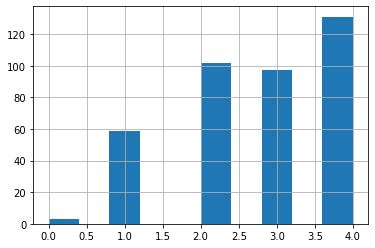

In [9]:
# 7 ----------------Medu--------------------
# В столбце присутствуют пропуски
# Образование матери влияет на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.Medu)
pd.DataFrame(stud_math.Medu.value_counts())
stud_math.Medu.hist()
stud_math.Medu.describe()

6.08 % - пропусков в столбце


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

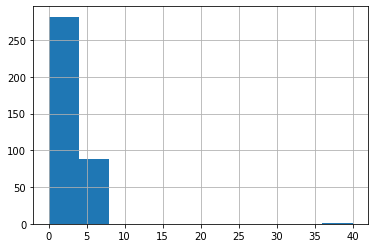

In [10]:
# 8 -------------------Fedu------------------------
# В столбце присутствуют пропуски
# В столбце присутствуют один выброс, связанный с некорректным набором данных
# Образование отца влияет на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.Fedu)
display(pd.DataFrame(stud_math.Fedu.value_counts()))
stud_math.Fedu.hist()
stud_math.Fedu.describe()


<AxesSubplot:>

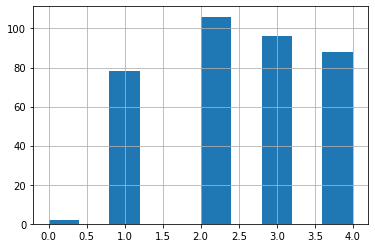

In [11]:
# Избавляемся от выбросов
stud_math = stud_math.loc[stud_math.Fedu <= 4]
stud_math.Fedu.hist()

In [12]:
# 9 ------------------Mjob---------------------
# В столбце присутствуют пропуски
# Работа матери влияет на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.Mjob)
pd.DataFrame(stud_math.Mjob.value_counts())

5.14 % - пропусков в столбце


,Mjob
other,125
services,90
at_home,57
teacher,48
health,31


In [13]:
# 10 ----------------Fjob-----------------------
# В столбце присутствуют пропуски
# Работа отца влияет на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.Fjob)
pd.DataFrame(stud_math.Fjob.value_counts())

9.19 % - пропусков в столбце


,Fjob
other,189
services,94
teacher,26
at_home,14
health,13


In [14]:
# 11 ----------------reason--------------------
# Причина выбора школы не влияет на условия жизни учащегося
# Столбец удаляем
stud_math.drop(['reason'], inplace = True, axis = 1)

In [15]:
# 12 --------------guardian--------------------
# В столбце присутствуют пропуски
# Опекун
# Предположительно влияет
# Столбец оставляем
omissions_procent(stud_math.guardian)
pd.DataFrame(stud_math.guardian.value_counts())

8.11 % - пропусков в столбце


,guardian
mother,236
father,78
other,26


In [16]:
# 13 --------------------traveltime----------------
# В столбце присутствуют пропуски
# Время в пути до школы
# Предположение что влияет
# Столбец оставляем
omissions_procent(stud_math.traveltime)
pd.DataFrame(stud_math.traveltime.value_counts())

6.76 % - пропусков в столбце


,traveltime
1.0,225
2.0,92
3.0,21
4.0,7


1.89 % - пропусков в столбце


,studytime
2.0,182
1.0,98
3.0,58
4.0,25


<AxesSubplot:>

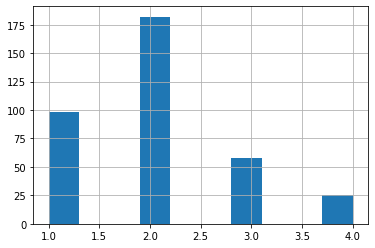

In [17]:
# 14 --------------studytime--------------
# В столбце присутствуют пропуски
# Время на учёбу помимо школы в неделю, должно влиять
# Столбец оставляем
omissions_procent(stud_math.studytime)
display(pd.DataFrame(stud_math.studytime.value_counts()))
stud_math.studytime.hist()

In [18]:
# 15 --------------failures------------------
# В столбце присутствуют пропуски
# Количество внеучебных неудач не влияет на условия жизни учащегося
# Столбец удаляем
omissions_procent(stud_math.failures)
pd.DataFrame(stud_math.failures.value_counts())
stud_math.drop(['failures'], inplace = True, axis = 1)

5.14 % - пропусков в столбце


In [19]:
# 16 ---------------schoolsup---------------------
# В столбце присутствуют пропуски
# Дополнительная образовательная поддержка влияет на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.schoolsup)
pd.DataFrame(stud_math.schoolsup.value_counts())

2.43 % - пропусков в столбце


,schoolsup
no,314
yes,47


In [20]:
# 17 ----------------------famsup------------------
# В столбце присутствуют пропуски
# Семейная образовательная поддержка влияет на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.famsup)
pd.DataFrame(stud_math.famsup.value_counts())

9.46 % - пропусков в столбце


,famsup
yes,204
no,131


In [21]:
# 18 ------------------paid--------------------
# В столбце присутствуют пропуски,их достаточно много
# Дополнительные платные занятия по математике влияют на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.paid)
pd.DataFrame(stud_math.paid.value_counts())

10.0 % - пропусков в столбце


,paid
no,188
yes,145


In [22]:
# 19 -----------------activities-----------------
# В столбце присутствуют пропуски
# Дополнительные внеучебные занятия влияют на условия жизни учащегося
# Столбец оставляем
omissions_procent(stud_math.activities)
pd.DataFrame(stud_math.activities.value_counts())


3.78 % - пропусков в столбце


,activities
yes,180
no,176


In [23]:
# 20 ------------------nursery--------------------
# Посещение детского сада не влияет на уровень жизни учащегося
# Столбец удаляем
omissions_procent(stud_math.nursery)
pd.DataFrame(stud_math.nursery.value_counts())
stud_math.drop(['nursery'], inplace = True, axis = 1)

4.32 % - пропусков в столбце


1.89 % - пропусков в столбце


,"studytime, granular"
-6.0,182
-3.0,98
-9.0,58
-12.0,25


<AxesSubplot:>

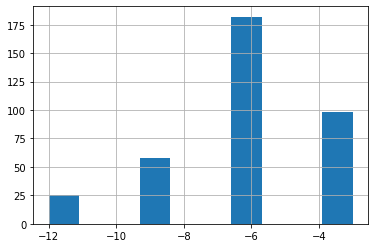

In [24]:
# 21  --------studytime, granular-----------------
# Столбец неописан в задании. Не понял что за данные.
# Предполагаю что это какой то период обучения исходя из названия.
# Но тогда почему значения отрицательные непонятно.
# В столбце присутствуют пропуски
# Столбец оставляем
omissions_procent(stud_math['studytime, granular'])
display(pd.DataFrame(stud_math['studytime, granular'].value_counts()))
stud_math['studytime, granular'].hist()

In [25]:
# 22 ------------higher -----------------
# Хочет получить высшее образование. Этот столбец не влияет на условия жизни
# Столбец удаляем
stud_math.drop(['higher'], inplace = True, axis = 1)

In [26]:
# 23 ---------------internet---------------
# В столбце присутствуют пропуски
# Наличие интернета дома влияет на условия жизни
# Столбец оставляем
omissions_procent(stud_math.internet)
pd.DataFrame(stud_math.internet.value_counts())

8.92 % - пропусков в столбце


,internet
yes,283
no,54


In [27]:
# 24 ---------------romantic---------------
# В романтических отношениях
# Не влияет на условия жизни
# Столбец удаляем
stud_math.drop(['romantic'], inplace = True, axis = 1)

6.49 % - пропусков в столбце


,famrel
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7
-1.0,1


<AxesSubplot:>

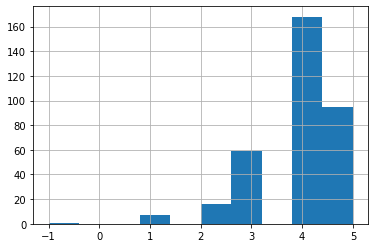

In [28]:
# 25 ----------------famrel-------------
# В столбце присутствуют пропуски
# Есть один выброс связанный с некорректным вводом
# Семейные отношения (от 1 - очень плохо до 5 - очень хорошо) влияют на условия жизни
# Столбец оставляем
omissions_procent(stud_math.famrel)
display(pd.DataFrame(stud_math.famrel.value_counts()))
stud_math.famrel.hist()

<AxesSubplot:>

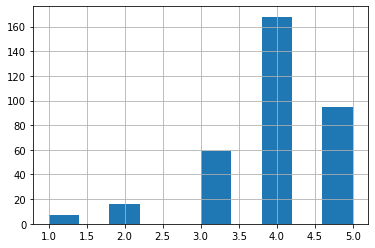

In [29]:
# Избавляемся от выбросов
stud_math = stud_math.loc[stud_math.famrel > 0]
stud_math.famrel.hist()

2.61 % - пропусков в столбце


,freetime
3.0,134
4.0,97
2.0,54
5.0,34
1.0,17


<AxesSubplot:>

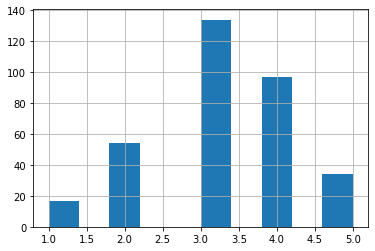

In [30]:
# 26 ------------freetime---------
# В столбце присутствуют пропуски
# Свободное время после школы (от 1 - очень мало до 5 - очень мого) влияют на условия жизни
# Столбец оставляем
omissions_procent(stud_math.freetime)
display(pd.DataFrame(stud_math.freetime.value_counts()))
stud_math.freetime.hist()

2.32 % - пропусков в столбце


,goout
3.0,115
2.0,87
4.0,71
5.0,45
1.0,19


<AxesSubplot:>

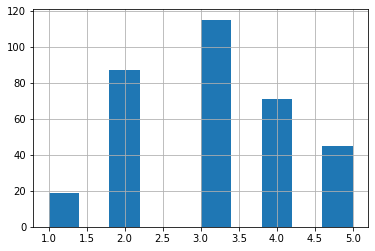

In [31]:
# 27 -------------goout---------------
# В столбце присутствуют пропуски
# Проведение времени с друзьями (от 1 - очень мало до 5 - очень много) влияют на условия жизни
# Столбец оставляем 
omissions_procent(stud_math.goout)
display(pd.DataFrame(stud_math.goout.value_counts()))
stud_math.goout.hist()

3.77 % - пропусков в столбце


,health
5.0,111
3.0,81
4.0,58
1.0,42
2.0,40


<AxesSubplot:>

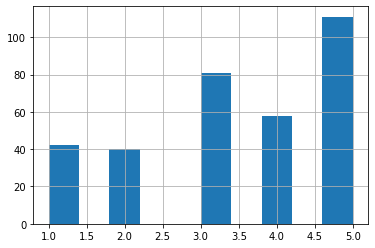

In [32]:
# 28 --------------health------------
# В столбце присутствуют пропуски
# Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) влияют на условия жизни
# Столбец оставляем
omissions_procent(stud_math.health)
display(pd.DataFrame(stud_math.health.value_counts()))
stud_math.health.hist()

3.48 % - пропусков в столбце


,absences
0.0,95
2.0,54
4.0,47
6.0,27
8.0,21
10.0,14
12.0,11
14.0,9
3.0,8
16.0,7


count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

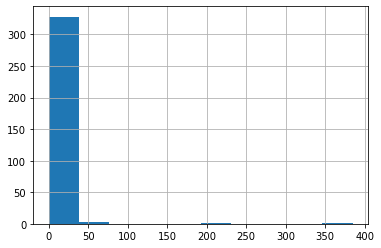

In [33]:
# 29 ----------absences-------------
# В столбце присутствуют пропуски
# В столбце присутствуют выбросы
# Количество пропущенных занятий влияет на условия жизни
# Столбец оставляем
omissions_procent(stud_math.absences)
display(pd.DataFrame(stud_math.absences.value_counts()))
stud_math.absences.hist()
stud_math.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


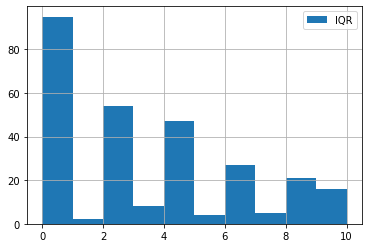

In [34]:
info_hist_iqr(stud_math.absences, 10)

In [35]:
# Отсекаем выбросы
delete_unrange_iqr(stud_math, stud_math.absences)


1.74 % - пропусков в столбце


,score
50.0,51
55.0,42
0.0,31
65.0,28
75.0,27
60.0,27
40.0,26
70.0,23
45.0,20
80.0,16


count    339.000000
mean      52.477876
std       22.556214
min        0.000000
25%       42.500000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

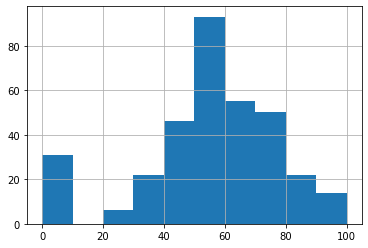

In [36]:
# 30 --------------score----------------------
# В столбце присутствуют пропуски
# Баллы по госэкзамену по математике

omissions_procent(stud_math.score)
display(pd.DataFrame(stud_math.score.value_counts()))
stud_math.score.hist()
stud_math.score.describe()

25-й перцентиль: 42.5, 75-й перцентиль: 70.0, IQR: 27.5,  Границы выбросов: [1.25, 111.25].


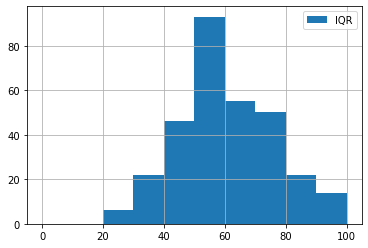

In [37]:
info_hist_iqr(stud_math.score, 100)

In [38]:
# Отсекаем выбросы
#delete_unrange_iqr(stud_math, stud_math.score)
# Почему то функция не отработала, поменял на код из примера, отложил разбор ошибки на пару дней
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
stud_math = stud_math.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]


In [39]:
# ================Корреляционный анализ=======================
# sns.pairplot(stud_math, kind = 'reg')


In [40]:
stud_math.corr()

,Medu,Fedu,traveltime,studytime,"studytime, granular",famrel,freetime,goout,health,absences,score
Medu,1.000000,0.623277,-0.153984,0.081203,-0.081203,-0.015481,0.006043,0.093004,-0.064927,-0.026699,0.180558
Fedu,0.623277,1.000000,-0.181685,-0.007760,0.007760,-0.027716,-0.027693,0.037420,0.006017,0.025709,0.136063
traveltime,-0.153984,-0.181685,1.000000,-0.119623,0.119623,-0.054459,0.005918,0.023772,-0.000081,-0.065941,-0.081853
studytime,0.081203,-0.007760,-0.119623,1.000000,-1.000000,0.037804,-0.123678,-0.047060,-0.100978,-0.021730,0.149390
"studytime, granular",-0.081203,0.007760,0.119623,-1.000000,1.000000,-0.037804,0.123678,0.047060,0.100978,0.021730,-0.149390
famrel,-0.015481,-0.027716,-0.054459,0.037804,-0.037804,1.000000,0.147663,0.047466,0.125532,-0.087857,0.020343
freetime,0.006043,-0.027693,0.005918,-0.123678,0.123678,0.147663,1.000000,0.273381,0.124335,0.027808,-0.009284
goout,0.093004,0.037420,0.023772,-0.047060,0.047060,0.047466,0.273381,1.000000,-0.017961,-0.052076,-0.160280
health,-0.064927,0.006017,-0.000081,-0.100978,0.100978,0.125532,0.124335,-0.017961,1.000000,-0.021021,-0.056890
absences,-0.026699,0.025709,-0.065941,-0.021730,0.021730,-0.087857,0.027808,-0.052076,-0.021021,1.000000,0.012334


In [41]:
# Вижу что столбцы studytime и studytime, granular коррелируют полностью, но только со знаком минус. 
# Оставляю столбец studytime.
# Остальные столбцы - корреляция слабая.
# Внимание привлекли столбцы Medu и Fedu, у них достаточно высокая кореляция и их как то можно было обьеденить в один признак.
# Но пока я таким инструментарием не обладаю.

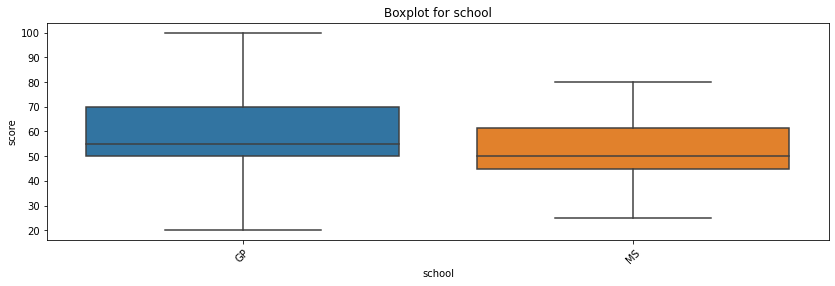

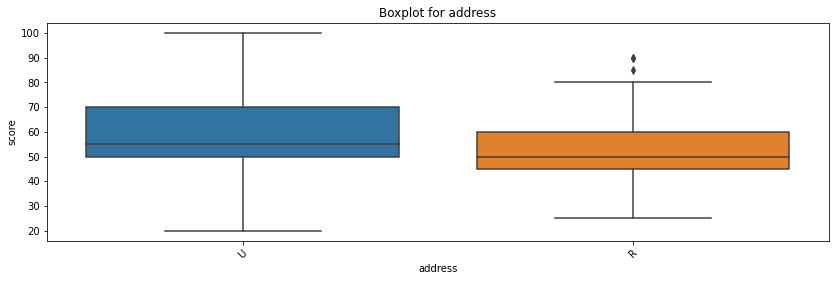

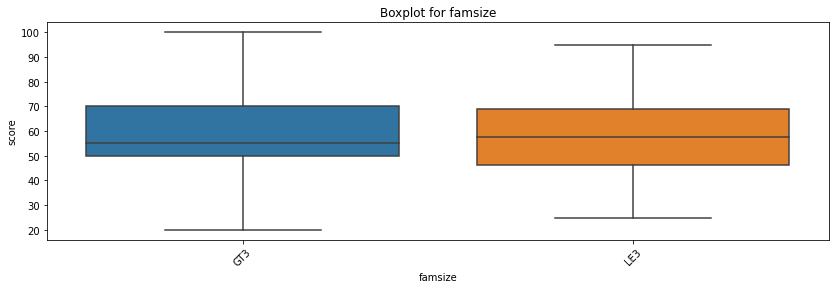

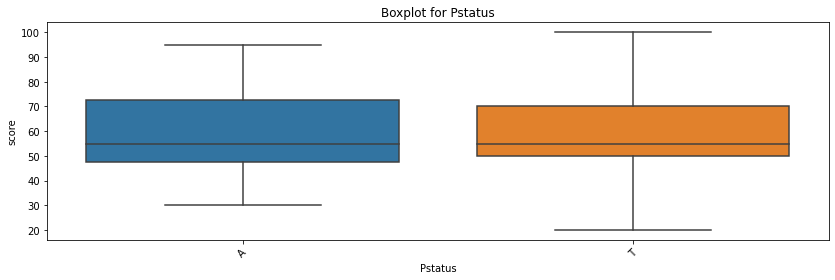

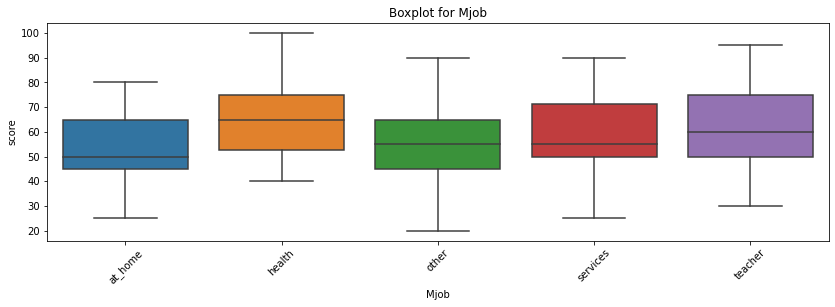

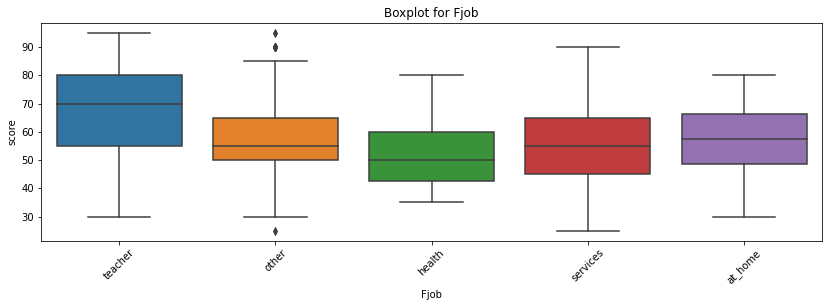

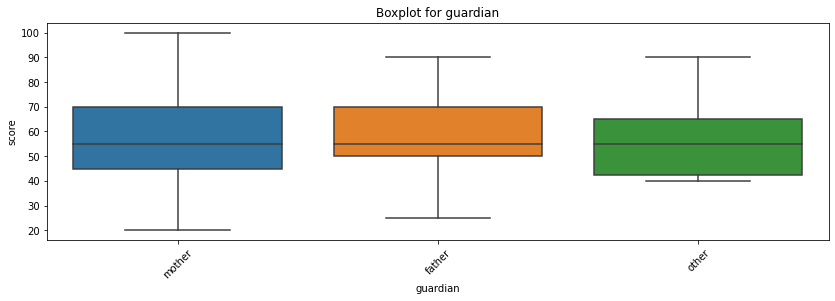

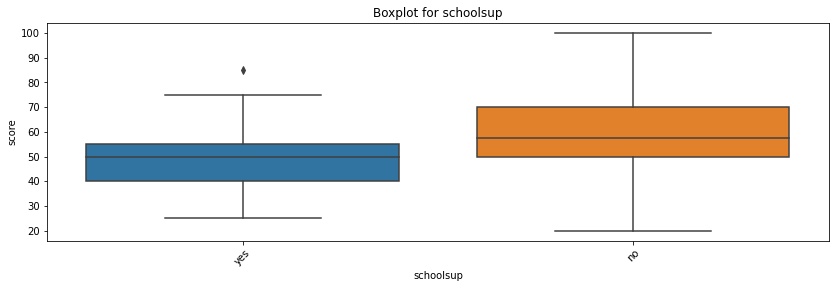

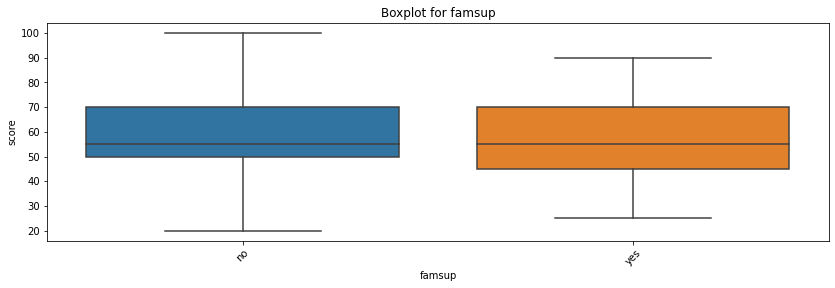

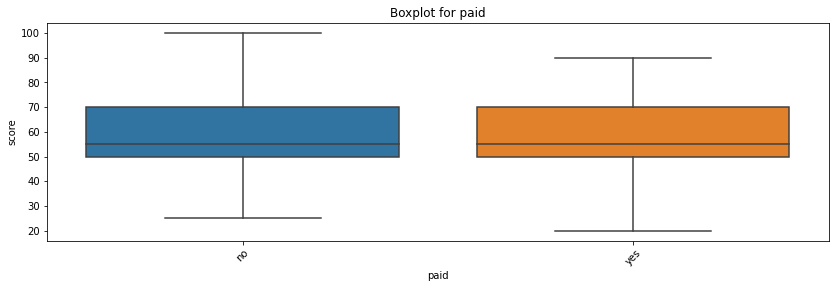

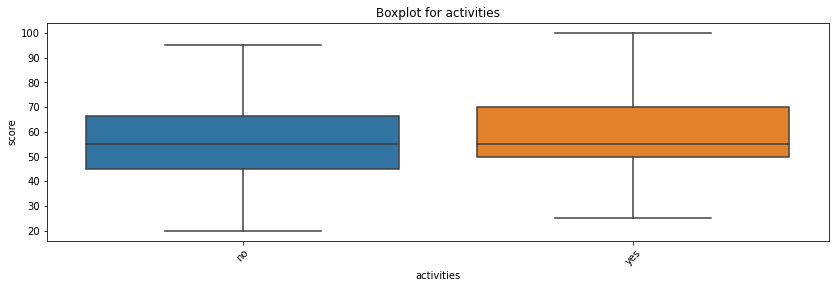

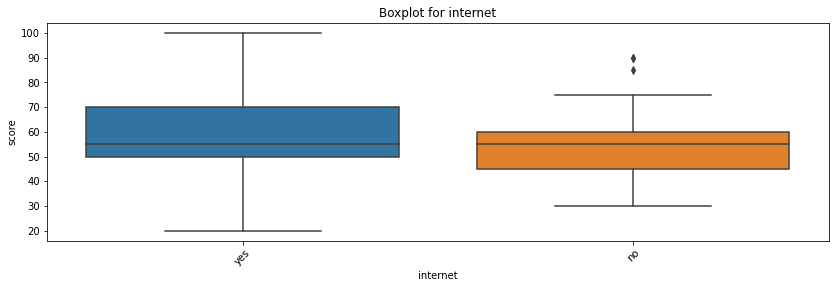

In [42]:
for col in ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'internet']:
    get_boxplot(col, 'score', stud_math)

In [43]:
# Визуально вижу по boxplot-ам что все параметры могут влиять на итоговый балл


In [44]:
for col in ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'internet']:
    get_stat_dif(col, 'score', stud_math)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


In [45]:
# Выводы
# 1. Первый в жизни EDA сделан
# 2. В данных достаточно мало пустых значений
# 3. Выбросы найдены в столбцах score, absences, famrel, Fedu. Делаем вывод что данные достаточно чистые.
# 4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это
# Medu, Fedu, traveltime, studytime, famrel, freetime, goout, health, absences, 
# score, address, Mjob, Fjob, schoolsup